<a href="https://colab.research.google.com/github/claramarto11/AAvanceproject/blob/Jo%C3%A3o-Alex/Lab2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory Session 2 -- Assignment

To be delivered until 2022-12-16 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.a)** Load the dataset "wine.csv". Do not change the dataset file.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("winequality.csv", sep='\;')
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


**2.b)** Encode the feature "type".

In [2]:
df["type"] = (df['type'] == 'red').astype(int)
df["type"]

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

**2.c)** Perform a simple linear regression considering *quality* as the response and *pH* as the predictor. Given the results, comment on the following statements:

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df['pH'].values.reshape(-1, 1)
y = df['quality'].values.reshape(-1, 1)

regr = LinearRegression()
regr.fit(X, y)

print('quality = {:.4f} + {:.4f} * pH'.format(regr.intercept_[0], regr.coef_[0][0]))

pH_pred = regr.predict(X)
r2_value = r2_score(y, pH_pred)
print('R^2: {:.4f}'.format(r2_value))

quality = 5.4774 + 0.1059 * pH
R^2: 0.0004


    i) Are the predictor and response statistically related?

    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

    iii) Is the relationship between the predictor and response positive or negative?

    iv) What is the predicted value of quality when the pH is 9?

**2.d)** Plot a scatter plot of the response and predictor, along with the regression line.

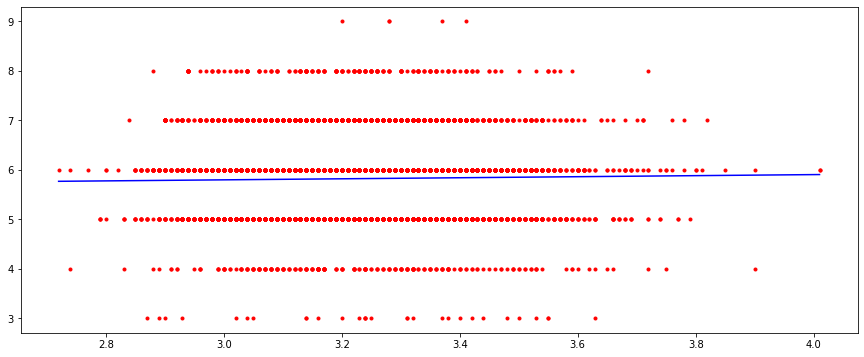

In [4]:
limits_pH = np.array([min(X), max(X)])
quality_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_pH

plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df['pH'], df['quality'], '.r')
plt.plot(limits_pH, quality_vals, 'b-')
plt.show()

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

**4.a)** Create a new column, "quality7", that contains a 1 if quality contains a value equal or above 7, and a 0 if quality contains a value below 7. Drop the original column "quality".

In [5]:
df = df.copy()
df ['quality7'] = df ['quality']
df = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'type','quality7']]
df["quality7"] = (df['quality7'] >= 7).astype(int)
df.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality7
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0


**4.b)** Do a correlation matrix plot between all the columns to evaluate which features are linearly correlated. Consider a statistical significance of 0.1%. Describe your findings, with a focus on evaluating which features are most related with "quality7".

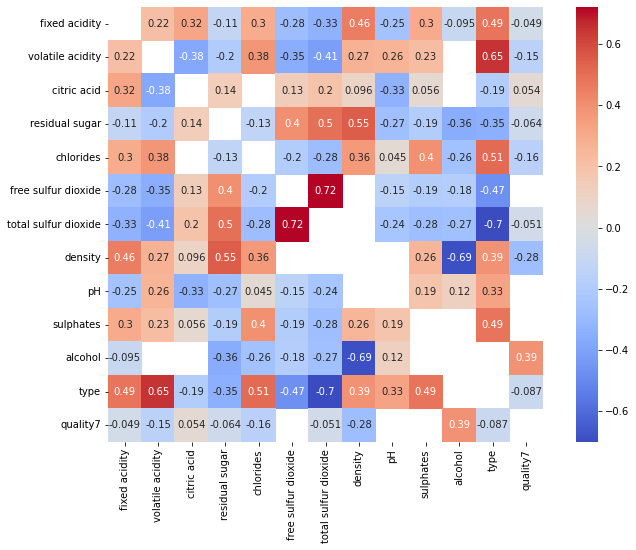

In [6]:
from scipy.stats import pearsonr
df_corrs = df.corr()
pvals = df.corr(method=lambda x,y: pearsonr(x,y)[1])
ptg = 0.1/100
mask = pvals > ptg
plt.subplots(figsize=(12, 8))
sns.heatmap(df_corrs, mask=mask, square=True, annot=True, cmap="coolwarm")

#falta descrever os resultados

**4.c)** Create the inputs as all the predictors and outputs as the "quality7" feature. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [7]:
from random import sample
import random

test_size = 0.3
seed = 100
random.seed(seed)
idxs_test = sample(range(df.shape[0]), int(test_size * df.shape[0]))
idxs_train = [i for i in range(df.shape[0]) if i not in idxs_test]

df_train = df.iloc[idxs_train,:].copy()
df_test = df.iloc[idxs_test,:].copy()

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'type']
X_train = df_train[features]
y_train = df_train['quality7']
X_test = df_test[features]
y_test = df_test['quality7']

**4.d)** Perform LDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\nTest error: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_LDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()



Test error: 18.21%


**4.e)** Perform QDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\nTest error: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_QDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()


Test error: 26.94%


**4.f)** Perform logistic regression on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\nTest error: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_logistic_pred = model.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()


Test error: 18.52%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4.g)** Perform naive Bayes on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [11]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('\nTest error: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_GNB_pred = model.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()


Test error: 28.94%


**4.h)** Perform KNN on the training data, with several values of K, in order to predict "quality7" using the remaining variables. What test errors are obtained? Which value of K seems to perform the best on this data set?

In [16]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):
 
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy_val = accuracy_score(y_pred, y_test)*100

  if verbosity == 1:
        print('\nTest error: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

  return model, accuracy_val
for i in range(1,11):
  model, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i, verbosity=1)
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_KNN_pred = model.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()


Test error: 19.14%

Test error: 18.32%

Test error: 21.14%

Test error: 19.34%

Test error: 20.93%

Test error: 18.93%

Test error: 20.01%

Test error: 19.39%

Test error: 19.70%

Test error: 19.65%


**R.:** For k=2 the accuracy is the highest.

**4.i)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [22]:
from sklearn.metrics import roc_auc_score

print('AUC'.rjust(25))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))
print('{}: {:.3f}'.format('KNN'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))

                      AUC


ValueError: ignored

**4.j)** Plot the ROC curves for the 5 methods. Compare the results.

In [23]:
from sklearn.metrics import roc_curve

lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)

plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN')

ValueError: ignored

# **VER COMO É QUE SE RESOLVE A PARTE DE GUARDAR AS VARIAVEIS PARA USAR NO i) e no j)**

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how the leave-one-out cross validation (LOOCV) is implemented.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

**8)** Enter your GitHub repository webpage.